# Problem 2:

A dataset of Shark Tank episodes is made available. It contains 495 entrepreneurs making their pitch 
to the VC sharks.

You will ONLY use “Description” column for the initial text mining exercise.

1. Pick out the Deal (Dependent Variable) and Description columns into a separate data frame. 
2. Create two corpora, one with those who secured a Deal, the other with those who did not secure a deal.
3. The following exercise is to be done for both the corpora:
    - a) Find the number of characters for both the corpuses.
    - b) Remove Stop Words from the corpora. (Words like ‘also’, ‘made’, ‘makes’, ‘like’, ‘this’, ‘even’ and ‘company’ are to be removed)
    - c) What were the top 3 most frequently occurring words in both corpuses (after removing stop words)?
    - d) Plot the Word Cloud for both the corpora.
4. Refer to both the word clouds. What do you infer?
5. Looking at the word clouds, is it true that the entrepreneurs who introduced devices are less likely to secure a deal based on your analysis?

### <font color= "blue"> Loaded all the necessary library for the model building.

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('seaborn')
import matplotlib.style
plt.style.use('seaborn')
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
df = pd.read_csv('Shark Tank Companies (2) (3).csv')

In [5]:
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False


### Importing "inaugural" corpora from the nltk in python.

In [287]:
from nltk.corpus import inaugural

In [6]:
inaugural.fileids()

NameError: name 'inaugural' is not defined

In [290]:
index = ['1941-Roosevelt','1961-Kennedy','1973-Nixon']
inaugural_speech = pd.DataFrame({'President' : ['Roosevelt - 1941','Kennedy - 1961','Nixon - 1973'],
                                'Text':[inaugural.raw('1941-Roosevelt.txt'),
                                        inaugural.raw('1961-Kennedy.txt'),
                                       inaugural.raw('1973-Nixon.txt')]},index=index)

inaugural_speech

,President,Text
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


## 2.1 Find the number of characters, words, and sentences for the mentioned documents.

### Number of characters :

In [291]:
inaugural_speech['Character_Count']=inaugural_speech['Text'].str.len()
inaugural_speech

,President,Text,Character_Count
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,7571
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991


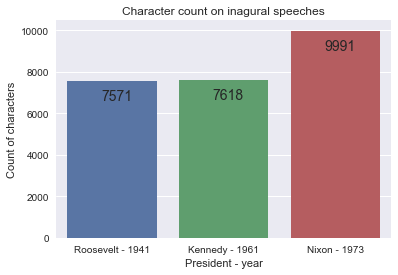

In [292]:
ax=sns.barplot(y='Character_Count', x='President',data=inaugural_speech)
plt.title('Character count on inagural speeches')
plt.xlabel('President - year')
plt.ylabel('Count of characters')
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+.3,i.get_height()-950), fontsize = 14)

### <font color = 'green'>Observation:<font color = 'black'>

From the above graph, we can see that President Nixon speech has the maximum number of characters as compared to other.

### Number for Words :

In [293]:
inaugural_speech['Word_Count'] = inaugural_speech['Text'].apply(lambda x:len(str(x).split(' ')))
inaugural_speech

,President,Text,Character_Count,Word_Count
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,7571,1323
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1364
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,1769


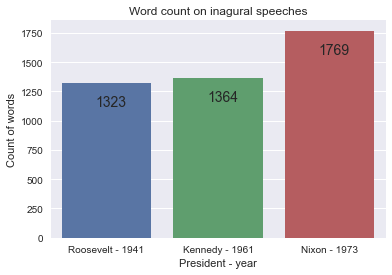

In [294]:
ax=sns.barplot(y='Word_Count',x='President',data=inaugural_speech)
plt.title('Word count on inagural speeches')
plt.xlabel('President - year')
plt.ylabel('Count of words')
for i in ax.patches:
    ax.annotate("{:.0f}".format(i.get_height()), (i.get_x()+.3, i.get_height()-200), fontsize = 14)

### <font color = 'green'>Observation:<font color = 'black'>

From the above graph, we can see that President Nixon speech has the maximum number of words as compared to other.

### Number of Sentence:

In [295]:
from nltk.tokenize import sent_tokenize
inaugural_speech['Sentence_Count']=inaugural_speech['Text'].apply(lambda x: len(sent_tokenize(x)))
inaugural_speech

,President,Text,Character_Count,Word_Count,Sentence_Count
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,7571,1323,68
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1364,52
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,1769,68


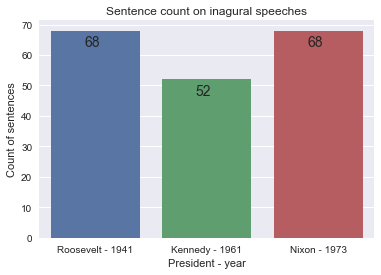

In [296]:
ax=sns.barplot(x='President', y='Sentence_Count', data=inaugural_speech)
plt.title('Sentence count on inagural speeches')
plt.xlabel('President - year')
plt.ylabel('Count of sentences')
for i in ax.patches:
    ax.annotate("{:.0f}".format(i.get_height()), (i.get_x()+.3, i.get_height()-5), fontsize = 14)

### <font color = 'green'>Observation:<font color = 'black'>

From the above graph, we can see that President Nixon and President Roosevelt speech has the maximum number of characters as compared to President Kennedy.

## 2.2 Remove all the stopwords from all three speeches.

### Barplot before removing the stopwords from the three speeches :

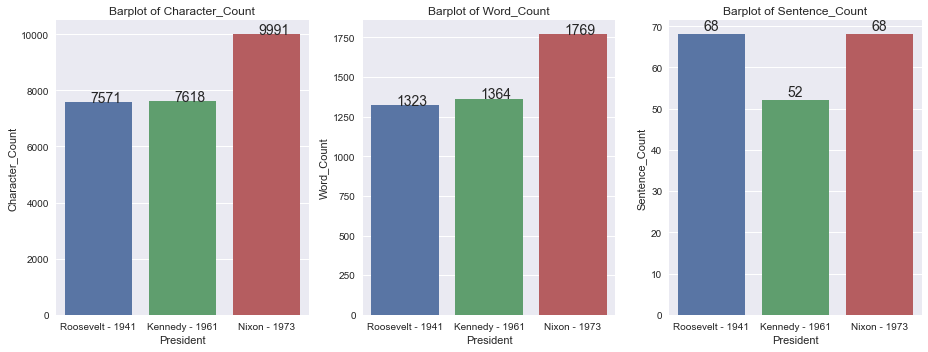

In [297]:
dv = inaugural_speech[['Character_Count','Word_Count','Sentence_Count']]
plt.figure(figsize=(13,5))
feat_dv = dv.columns
for i in range(len(feat_dv)):
    plt.subplot(1,3,i+1)
    ax=sns.barplot(x='President', y=inaugural_speech[feat_dv[i]],data=inaugural_speech)
    plt.title('Barplot of {}'.format(feat_dv[i]))
    plt.tight_layout()
    for i in ax.patches:
        ax.annotate("{:.0f}".format(i.get_height()), (i.get_x()+.3, i.get_height()+1), fontsize = 14)
   

### Lower Case Conversion:

In [298]:
inaugural_speech['Text']=inaugural_speech['Text'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
inaugural_speech

,President,Text,Character_Count,Word_Count,Sentence_Count
1941-Roosevelt,Roosevelt - 1941,on each national day of inauguration since 178...,7571,1323,68
1961-Kennedy,Kennedy - 1961,"vice president johnson, mr. speaker, mr. chief...",7618,1364,52
1973-Nixon,Nixon - 1973,"mr. vice president, mr. speaker, mr. chief jus...",9991,1769,68


From the above table, we can see that all the text variables is coverted in Lower case.

### Remove Punctuation:

In [299]:
inaugural_speech['Text']=inaugural_speech['Text'].str.replace('[^\w\s]',' ')
inaugural_speech

,President,Text,Character_Count,Word_Count,Sentence_Count
1941-Roosevelt,Roosevelt - 1941,on each national day of inauguration since 178...,7571,1323,68
1961-Kennedy,Kennedy - 1961,vice president johnson mr speaker mr chief...,7618,1364,52
1973-Nixon,Nixon - 1973,mr vice president mr speaker mr chief jus...,9991,1769,68


From the above table, we can see that all the punctuation has beed removed from the text variable

### Remove all the stopwords such as (it, on, in, the, etc)

In [300]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

add_to_stop_words = ['mr','on','it','the','in','let','to','us','shall']

stop_words.extend(add_to_stop_words)
stop_words= set(stop_words)

In [301]:
## inaugural_speech['Text']= inaugural_speech['Text'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop_words))
inaugural_speech['Text'] = inaugural_speech['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))


In [302]:
inaugural_speech['Sentence_Count']=inaugural_speech['Text'].apply(lambda x: len(sent_tokenize(x)))
inaugural_speech['Word_Count'] = inaugural_speech['Text'].apply(lambda x:len(str(x).split(' ')))
inaugural_speech['Character_Count']=inaugural_speech['Text'].str.len()
inaugural_speech

,President,Text,Character_Count,Word_Count,Sentence_Count
1941-Roosevelt,Roosevelt - 1941,national day inauguration since 1789 people re...,4549,621,1
1961-Kennedy,Kennedy - 1961,vice president johnson speaker chief justice p...,4633,660,1
1973-Nixon,Nixon - 1973,vice president speaker chief justice senator c...,5714,777,1


### Barplot After removing the stopwords from the three speeches :

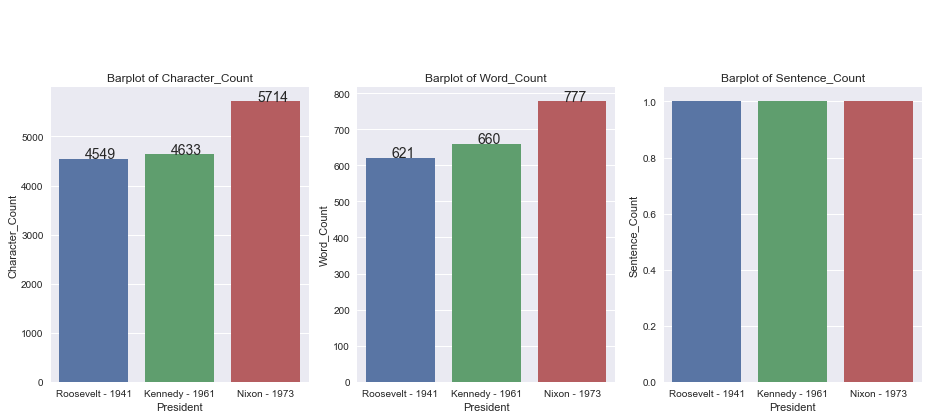

In [303]:
v = inaugural_speech[['Character_Count','Word_Count','Sentence_Count']]
plt.figure(figsize=(13,5))
feat_dv = dv.columns
for i in range(len(feat_dv)):
    plt.subplot(1,3,i+1)
    ax=sns.barplot(x='President', y=inaugural_speech[feat_dv[i]],data=inaugural_speech)
    plt.title('Barplot of {}'.format(feat_dv[i]))
    plt.tight_layout()
    for i in ax.patches:
        ax.annotate("{:.0f}".format(i.get_height()), (i.get_x()+.3, i.get_height()+.3), fontsize = 14)
   

### Lists of words in the speech of President Roosevelt - 1941

In [304]:
list(inaugural_speech[inaugural_speech['President']=='Roosevelt - 1941'].Text)

['national day inauguration since 1789 people renewed sense dedication united states washington day task people create weld together nation lincoln day task people preserve nation disruption within day task people save nation institutions disruption without come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man three score years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought greater security hope better understanding life ideals measured material things vita

### Lists of words in the speech of President Kennedy - 1961

In [305]:
list(inaugural_speech[inaugural_speech['President']=='Kennedy - 1961'].Text)

['vice president johnson speaker chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world every nation know whether wishes well ill pay price bear burden meet hardship support friend oppose foe order assure survival success liberty much p

### Lists of words in the speech of President Nixon - 1973

In [306]:
list(inaugural_speech[inaugural_speech['President']=='Nixon - 1973'].Text)

['vice president speaker chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question use peace resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw far reaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world america bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitations america role maintaining peace

## 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

### Top most word jused in President Roosevelt -(1941) speech

In [307]:
freq_r= pd.Series(' '.join(inaugural_speech.iloc[0:1,1]).split()).value_counts()[:7]
freq_r

nation       12
know         10
democracy     9
life          9
spirit        9
people        7
america       7
dtype: int64

                                    Inagural speech of Roosevelt - 1941


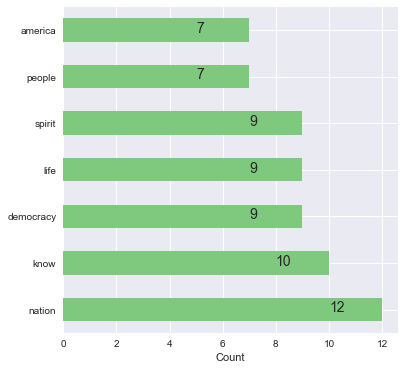

In [308]:
plt.figure(figsize=(6,6))
ax = freq_r.plot(kind='barh', colormap = 'Accent')
plt.xlabel('Count')
#plt.ylabel('Top words')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-2, p.get_y()+.20), fontsize=14)
print('                                    Inagural speech of Roosevelt - 1941')

### Top most word jused in President Kennedy -(1961) speech

In [309]:
freq_k = pd.Series(' '.join(inaugural_speech.iloc[1:2,1]).split()).value_counts()[:7]
freq_k

sides      8
world      8
pledge     7
new        7
ask        5
nations    5
power      5
dtype: int64

                                    Inagural speech of Kennedy - 1961


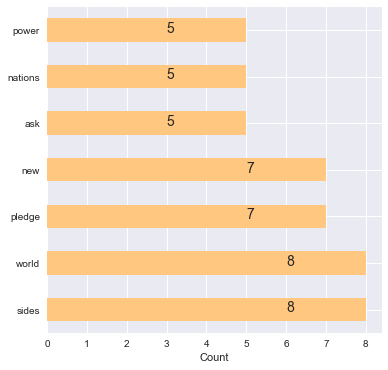

In [310]:
plt.figure(figsize=(6,6))
ax = freq_k.plot(kind='barh', colormap = 'copper_r')
plt.xlabel('Count')
#plt.ylabel('Top words')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-2, p.get_y()+.20), fontsize=14)
print('                                    Inagural speech of Kennedy - 1961')

### Top most word jused in President Nixon -(1973) speech

In [311]:
freq_n= pd.Series(' '.join(inaugural_speech.iloc[2:3,1]).split()).value_counts()[:7]
freq_n

america           21
peace             19
world             18
new               15
nation            11
responsibility    11
government        10
dtype: int64

                                    Inagural speech of Nixon - 1973


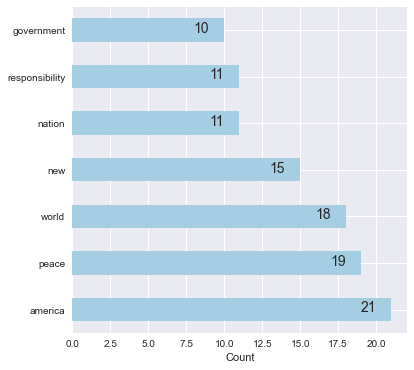

In [312]:
plt.figure(figsize=(6,6))
ax = freq_n.plot(kind='barh', colormap = "Paired")
plt.xlabel('Count')
#plt.ylabel('Top words')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-2, p.get_y()+.20), fontsize=14)
print('                                    Inagural speech of Nixon - 1973')

## 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)

In [313]:
inaugural_speech

,President,Text,Character_Count,Word_Count,Sentence_Count
1941-Roosevelt,Roosevelt - 1941,national day inauguration since 1789 people re...,4549,621,1
1961-Kennedy,Kennedy - 1961,vice president johnson speaker chief justice p...,4633,660,1
1973-Nixon,Nixon - 1973,vice president speaker chief justice senator c...,5714,777,1


### WordCloud of President Roosevelt - 1941 after Removing the Stopwords

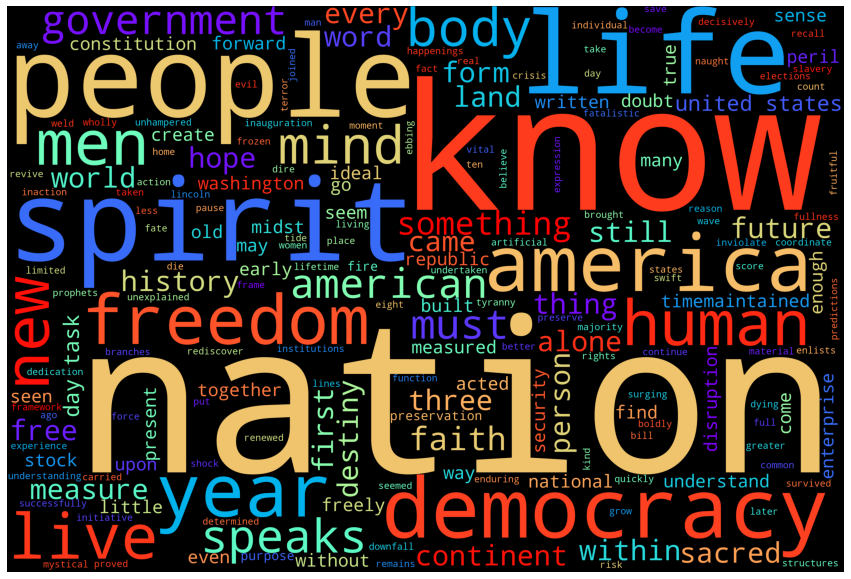

In [314]:
from wordcloud import WordCloud,STOPWORDS
words = ' '.join(inaugural_speech.iloc[0:1,1])
wordcloud = WordCloud(stopwords= STOPWORDS,
                     background_color='black',
                     colormap='rainbow',
                     width=3700,
                     height=2500).generate(words)
plt.figure(1,figsize=(15,15))
plt.imshow(wordcloud)
plt.axis('off');

### <font color='green'>Observation:<font color='black'>
- In President Roosevelt speech, we found 4549 numbers of "Characters".
- In President Roosevelt speech, we found 621 numbers of "Words".
- In President Roosevelt speech, the words which is used maximum time are : 
    - nation
    - know  
    - democracy 
    - life      
    - spirit   
    - people   
    - america  
  

### WordCloud of President Kennedy - 1961 after Removing the Stopwords

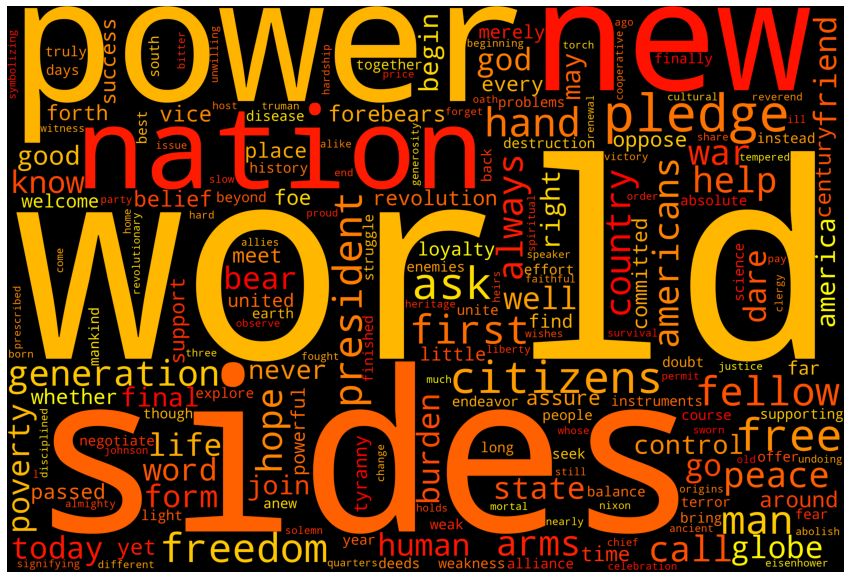

In [315]:
words = ' '.join(inaugural_speech.iloc[1:2,1])
wordcloud = WordCloud(stopwords= STOPWORDS,
                     background_color='black',
                     colormap='autumn',
                     width=3700,
                     height=2500).generate(words)
plt.figure(1,figsize=(15,15))
plt.imshow(wordcloud)
plt.axis('off');

### <font color='green'>Observation:<font color='black'>
- In President Kennedy speech, after removing stopwords, we found 4633 numbers of "Characters".
- In President Kennedy speech, after removing stopwords, we found 660 numbers of "Words".
- In President Kennedy speech, after removing stopwords, the words which is used maximum time are : 
    - sides   
    - world   
    - pledge   
    - new    
    - ask     
    - nations  
    - power  
    - free   
    - citizens 

### WordCloud of President Nixon - 1973	 after Removing the Stopwords

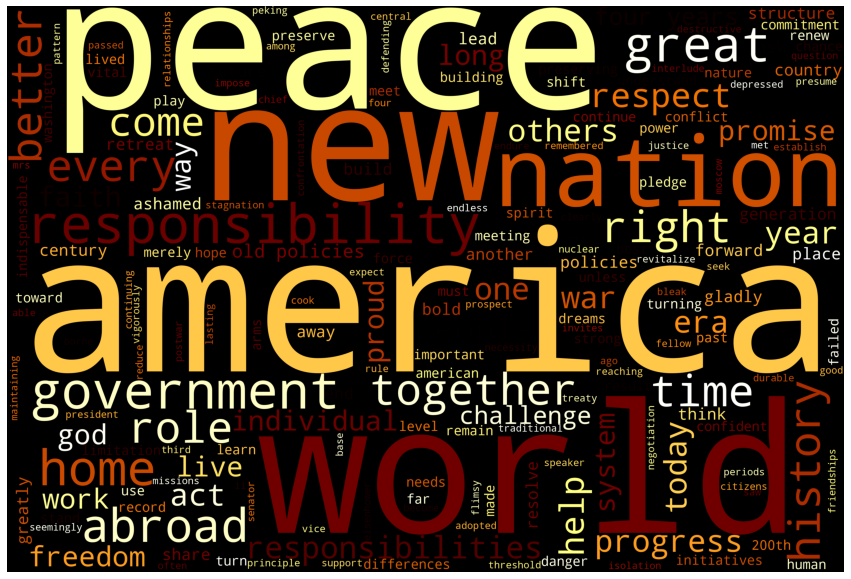

In [316]:
words = ' '.join(inaugural_speech.iloc[2:3,1])
wordcloud = WordCloud(stopwords= STOPWORDS,
                     background_color='black',
                     colormap='afmhot',
                     width=3700,
                     height=2500).generate(words)
plt.figure(1,figsize=(15,15))
plt.imshow(wordcloud)
plt.axis('off');

### <font color='green'>Observation:<font color='black'>
- In President Nixon speech, after removing stopwords, we found 5714 numbers of "Characters".
- In President Nixon speech, after removing stopwords, we found 777 numbers of "Words".
- In President Nixon speech, after removing stopwords, the words which is used maximum time are : 
    - america   
    - peace 
    - world   
    - new    
    - nation   
    - responsibility  
    - government